In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools

## Lost slots calculations and plots

Main sim script outputs - bed utilisation.  
Add - lost theatre slots and total throughput

In [110]:
number_of_runs = 100

#read in dataframes and concatenate
primary_pt_results = pd.read_csv('data/primary_patient_results.csv')
revision_pt_results = pd.read_csv('data/revision_patient_results.csv')
pt_results = pd.concat([primary_pt_results, revision_pt_results])
print(len(pt_results))

80500


In [111]:
pt_results.tail()

,Unnamed: 0,Day,weekday,ID,arrival time,patient class,surgery type,lost slots,queue time,los,delayed discharge,depart
19495,190,66,3,191,66,revision,r_hip,True,0.176415,0.0,False,66.176415
19496,191,67,4,192,67,revision,r_hip,True,0.215672,0.0,False,67.215672
19497,192,67,4,193,67,revision,r_hip,True,0.173746,0.0,False,67.173746
19498,193,67,4,194,67,revision,r_knee,True,0.036965,0.0,False,67.036965
19499,194,67,4,195,67,revision,r_knee,True,0.159541,0.0,False,67.159541


In [112]:
#double check
pt_results['patient class'].value_counts()

primary     61000
revision    19500
Name: patient class, dtype: int64

In [113]:
#summarise lost slots by day across runs
lost_slots_df = pt_results[["Day", "lost slots", "weekday"]]

lost_slots_df = pd.DataFrame(lost_slots_df.groupby(['Day', 'weekday'])['lost slots'].sum().astype(int))
lost_slots_df = lost_slots_df.assign(DayLostSlots = lambda x: (x['lost slots'] / number_of_runs))

lost_slots_df = pd.DataFrame(lost_slots_df["DayLostSlots"]).reset_index()
print(len(lost_slots_df))

50


In [114]:
#Day and weekdays with 0-arrivals are lost (ie 5 and 6 = sat and sun)
lost_slots_df.head(10)

,Day,weekday,DayLostSlots
0,0,0,0.00
1,1,1,0.00
2,2,2,0.00
3,3,3,8.18
4,4,4,8.05
5,7,0,0.10
6,8,1,3.57
7,9,2,7.07
8,10,3,9.84
9,11,4,8.02


In [115]:
#0-arrival days excluded from df - add to Days sequence and fill lost slots value with 0 lost slots
# use re-index as dataframe length increasing. Fill values in columns with 0.

lost_slots_df = (lost_slots_df.set_index('Day')
 .reindex(range(lost_slots_df.Day.iat[0],lost_slots_df.Day.iat[-1]+1), fill_value=0)
 .reset_index())

In [116]:
#change 0 weekdays into correct weekday integer

#need days of week seq and length of total range > length of dataframe
shortseq = np.arange(len(range(0,7)))
length = math.ceil(len(lost_slots_df) / 7)

#create total sequence and flatten array list into list of elements
sequence = ([np.tile((shortseq),length)])
flat_seq = list(itertools.chain(*sequence))

#truncate to correct length and save to column
sequence = flat_seq[:len(lost_slots_df)]
lost_slots_df['weekday'] = sequence


In [117]:
#save to csv - note warm-up period included in results

lost_slots_df.to_csv('data_summaries/Lost_slots_results_per_day.csv')

Text(0.5, 1.0, 'Lost theatre slots across model runtime')

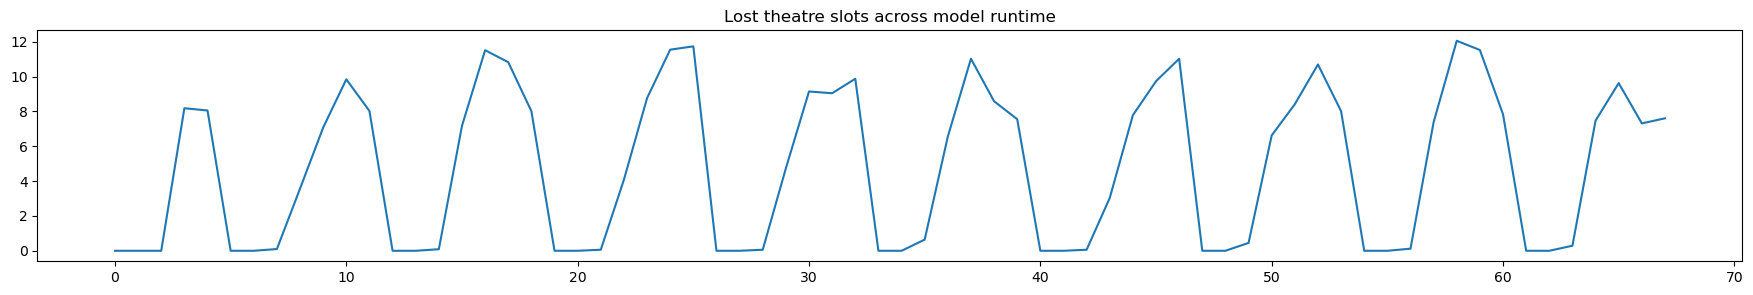

In [118]:
# plot per day - need to remove warm-up period
fig = plt.figure(figsize=(22,3))
ax = fig.add_subplot()

lost_slots_plot = ax.plot(lost_slots_df['DayLostSlots'])
ax.set_title('Lost theatre slots across model runtime')

In [119]:
# plot daily summary of lost slots
lost_slots_wk_plot = lost_slots_df.groupby('weekday').mean()
lost_slots_wk_plot.reset_index()
lost_slots_wk_plot

,Day,DayLostSlots
weekday,,
0,31.5,0.187
1,32.5,5.060
2,33.5,8.536
3,34.5,9.725
4,35.5,8.769
5,33.0,0.000
6,34.0,0.000


In [120]:
#lost_slots_wk_plot = lost_slots_wk_plot['DayLostSlots']#, 'DayLostSlots']]

Text(0.5, 1.0, 'Lost slots per day of week')

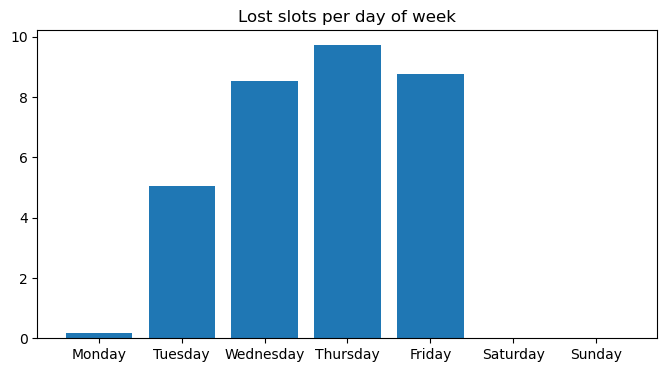

In [121]:
values = lost_slots_wk_plot['DayLostSlots']
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
lost_slots_df = ax.bar(names, values)
#m_day_wd_plot = ax.plot(m_day_results_wd['bed_utilisation'] )
ax.set_title('Lost slots per day of week')
#plt.savefig('Bed Utilisation example output')